##  Laboratory Task 3
## Machine Learning Technologies

**ITMO university. 1st semester**

Performed by: Gleb Mikloshevich

Group: J4132C

---

Course: MLT September

Lecturer: Petr Gladilin



In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Part one

### a) Gradient descent with momentum
This is a method that helps accelerate GD in the relevant direction and suppresses oscillations. It implies adding a fraction $\beta$ of the previous vector adding the fraction $(1 - \beta)$ of the upcoming gradient.
This approach is called "exponential moving average":

$$V_t = \beta V_{t-1} + (1 - \beta) g_t$$
$$ \textbf{$\theta_{t}$} := \textbf{$\theta_{t-1}$} - \eta V_t,$$

where $g_t$ - is the current gradient.

$\beta$ is usually set to 0.9.


In [2]:
def gd_momentum(df: callable, x_start: np.ndarray, lr: float = 1e-3,
                beta: float = 0.9, epsilon: float = 1e-6, debug=False
                ) -> tuple[float, np.ndarray, int]:
    '''
    Approximate solution of f(x)=0 by Gradient Descent method.

    Parameters
    ----------
    df : function
        First derivative of f(x).
    x_start : list of numbers
        Initial guess for a solution f(x)=0.
    lr: number
        Step size of gradient descent.
    beta: number
        Decay factor [between 0 and 1] that determines the
        relative contribution of the current gradient and
        earlier gradients to the weight change.
    epsilon: number
        Epsilon threshold - stopping criteria
    debug: float
        debug mode

    Returns
    -------
    x_next : number
        The minimal value of function.
    sequence: array
        Intermidiate results of gradient descent
    grad_itter: number
        Number of iterations.
    '''
    sequence = [x_start]
    iter: int = 0
    x_prev: np.ndarray = x_start
    x_next: np.ndarray = x_prev - lr*beta*df(x_prev)
    momentum = np.array([0, 0])

    while not iter or abs(x_prev.sum() - x_next.sum()) > epsilon:
        x_prev = x_next
        momentum = beta * momentum - lr*df(x_next)
        x_next = x_prev + momentum
        sequence.append(x_next)
        iter += 1
        if debug and not iter % 100:
            print(f"iter: {iter}, val: {x_next}")
    return (x_next, np.array(sequence), iter)

### b) Adam

Adam  (Adaptive momentum algorithm) combines momentum and RMSprop approaches:

- computes adaptive learning rates;
- storing an exponentially moving average of past squared gradients

and uses scaling of the gradients:

$${V_t^{corr}}= \frac{V_t}{1 - \beta^t}$$

Parameters:
- learning rate $\eta$
- $\beta_1$
- $\beta_2$
- $\epsilon$

The moving averages of past and past squared gradients $V_t$ and $S_t$ respectively are computed as follows:

$$V_t = \beta_1 V_{t-1} + (1 - \beta_1)g_t$$
$$S_t = \beta_2 S_{t-1} + (1 - \beta_2)g^2_t$$

Adam update rule for the model weights:

$$\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{{S_t^{corr}}} + \epsilon}{V_t}$$

Suggested values for $\beta_1$ is 0.9, for $\beta_2$ is 0.999 and $10^{-8}$ for $\epsilon$.

In [3]:
def adam(df: callable, x_start: np.ndarray, lr: float = 1e-3, b1: float = 0.9,
         b2: float = 0.999, epsilon: float = 1e-6, debug=False
         ) -> tuple[float, np.ndarray, int]:

    '''
    Approximate solution of f(x)=0 by Gradient Descent method.

    Parameters
    ----------
    df : function
        First derivative of f(x).
    x_start : list of numbers
        Initial guess for a solution f(x)=0.
    lr: number
        Step size of gradient descent.
    b1: number
        first momentum itertia
    b2: number
        second momentum itertia
    epsilon: number
        Epsilon threshold - stopping criteria
    debug: float
        debug mode

    Returns
    -------
    x_next : number
        The minimal value of function.
    sequence: array
        Intermidiate results of gradient descent
    grad_itter: number
        Number of iterations.
    '''
    sequence = [x_start]
    iter: int = 0
    x_prev: np.ndarray = x_start
    x_next: np.ndarray = x_start
    num_stub: float = 1e-8 # constant for numerical stabilization
    s = 0
    r = 0
    while iter < 20 or abs(x_prev.sum() - x_next.sum()) > epsilon:
        x_prev = x_next
        g = df(x_prev)
        iter += 1
        s = b1*s + (1. - b1) * g
        r = b2*r + (1. - b2) * g**2

        cor_s = s / (1. - b1**iter)
        cor_r = r / (1. - b2**iter)

        delta_x = -lr * cor_s / (np.sqrt(cor_r) + num_stub)
        x_next = x_next + delta_x

        sequence.append(x_next)
        if debug and not iter % 100:
            print(f"iter: {iter}, val: {x_next}")

    return (x_next, np.array(sequence), iter)

## Part two

### 2.1  first function

In [4]:
def f1(x: np.ndarray)-> float:
    return x[0]**2 + x[1]**2 + 11

def grad_f1(x: np.ndarray) -> np.ndarray:
    return np.array([2*x[0], 2*x[1]])


In [5]:
x = np.arange(-15, 15, 0.01)
y = np.arange(-15,  15, 0.01)
start = np.ones(2) * 10
x, y = np.meshgrid(x, y)
z1 = f1([x, y])

In [6]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x, y, z1, vmin=z1.min())


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title("First function surface")


plt.show()

#### Gradient Descent with momentum

In [7]:
approx1gd = gd_momentum(grad_f1, start, debug=False)
print(f"iters: {approx1gd[2]}, f(x): {f1(approx1gd[0])}, x: {approx1gd[0]}")

iters: 508, f(x): 11.000000000642027, x: [1.79168362e-05 1.79168362e-05]


#### Adam

In [8]:
approx1adam = adam(grad_f1, start, debug=False)
print(f"iters: {approx1adam[2]}, f(x): {f1(approx1adam[0])}, x: {approx1adam[0]}")

iters: 15578, f(x): 11.000000018658591, x: [9.65882775e-05 9.65882775e-05]


As we can see. Adam required 50 times more iteration to calculate the function

#### Results

In [9]:
z1gd = f1(approx1gd[1])
z1adam = f1(approx1adam[1])

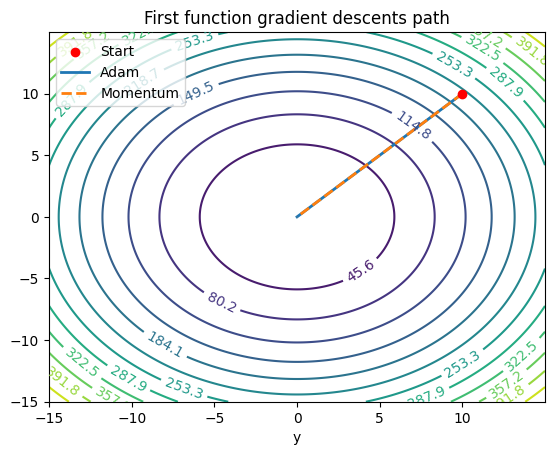

In [10]:
fig, ax = plt.subplots()
levels1 = np.linspace(np.min(z1), np.max(z1), 14)
cs = ax.contour(x, y, z1, levels=levels1)

plt.scatter(start[0], start[1], label="Start", c="red", zorder=3)
plt.plot(approx1adam[1].T[0], approx1adam[1].T[1], label="Adam", linewidth=2.)
plt.plot(approx1gd[1].T[0], approx1gd[1].T[1], label="Momentum", linewidth=2., linestyle='--')

plt.clabel(cs, inline=True, fontsize=10)
plt.legend(loc="best")
plt.xlabel("x")
plt.xlabel("y")
plt.title("First function gradient descents path")
plt.show()

### 2.2  second function

In [11]:
def f2(x: np.ndarray) -> float:
    return x[0]**2 + x[1]*np.sin(x[1])

def grad_f2(x: list[float]) -> np.ndarray:
    return np.array([2*x[0], np.sin(x[1]) + x[1]*np.cos(x[1])])

In [12]:
x = np.arange(-20, 20, 0.01)
y = np.arange(-20, 20, 0.01)
x, y = np.meshgrid(x, y)
start = np.ones(2) * 10
z2 = f2([x, y])

In [13]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x, y, z2, vmin=z2.min())


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title("Second function surface")


plt.show()

#### Gradient descent with momentum

In [14]:
approx2gd = gd_momentum(grad_f2, start, debug=False)
print(f"iters: {approx2gd[2]}, f(x): {f2(approx2gd[0])}, x: {approx2gd[0]}")

iters: 482, f(x): -11.040708014633724, x: [3.60038541e-05 1.10855384e+01]


#### Adam

In [15]:
approx2adam = adam(grad_f2, start, debug=False)
print(f"iters: {approx2adam[2]}, f(x): {f2(approx2adam[0])}, x: {approx2adam[0]}")

iters: 15422, f(x): -11.040707972155442, x: [2.09223707e-04 1.10855384e+01]


#### Results

In [16]:
z2gd = f2(approx2gd[1])

z2adam = f2(approx2adam[1])

In [17]:
fig, ax = plt.subplots()
levels2 = np.linspace(np.min(z2), np.max(z2), 14)
cs = ax.contour(x, y, z2, levels=levels2)

plt.scatter(start[0], start[1], label="Start", c="red", zorder=3)
plt.plot(approx2adam[1].T[0], approx2adam[1].T[1], label="Adam", linewidth=2.)
plt.plot(approx2gd[1].T[0], approx2gd[1].T[1], label="Momentum", linewidth=2., linestyle='--')

plt.clabel(cs, inline=True, fontsize=10)
plt.xlabel("x")
plt.xlabel("y")
plt.legend(loc="best")
plt.title("Second function gradient descents path")
plt.show()

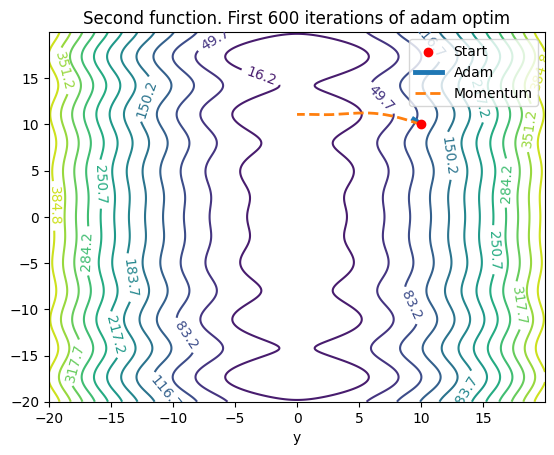

In [18]:
fig, ax = plt.subplots()
levels2 = np.linspace(np.min(z2), np.max(z2), 14)
cs = ax.contour(x, y, z2, levels=levels2)

plt.scatter(start[0], start[1], label="Start", c="red", zorder=3)
plt.plot(approx2adam[1].T[0][:600], approx2adam[1].T[1][:600], label="Adam", linewidth=3.5)
plt.plot(approx2gd[1].T[0], approx2gd[1].T[1], label="Momentum", linewidth=2., linestyle='--')

plt.clabel(cs, inline=True, fontsize=10)
plt.xlabel("x")
plt.xlabel("y")
plt.legend(loc="best")
plt.title("Second function. First 600 iterations of adam optim")
plt.show()

## Conclusion

| f  | momentum     | adam     |
|----|--------------|----------|
| f1 | 508          | 15578    |
| f2 | 482          | 15422    |

As we can see on the table above, Adam optimizer has 30 times more iterations than GD with momentum. Actually, I don't know why. I guess someting wrong with the initial momentum or I wrote spaghetti code.
It's seem that gradient descent with momemtum has a huge hadicap in the beginning so it can not converge rapidly.